In [1]:
import os, shutil
from  tensorflow import keras
import tensorflow as tf

In [2]:
pwd

'C:\\Users\\Hp\\Desktop\\ML and DL\\Neural networks with tensoflow\\Computer vision'

In [3]:
original_dataset_dir = r"C:\Users\Hp\Desktop\ML and DL\Neural networks with tensoflow\Computer vision\kaggle original data"
print(original_dataset_dir)

C:\Users\Hp\Desktop\ML and DL\Neural networks with tensoflow\Computer vision\kaggle original data


In [4]:
base_dir = 'C:\\Users\\Hp\\Desktop\\ML and DL\\Neural networks with tensoflow\\Computer vision\\cats_and_dogs_small'

In [5]:
os.mkdir(base_dir)

# Directories for the training, validation and test splits

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [7]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [8]:
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

# Directory with training cat pictures

In [9]:
train_cats_dir = os.path.join(train_dir, "cats") 
os.mkdir(train_cats_dir)

In [10]:
#Diretory with training dog pictures
train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)



In [11]:
#Directories with validation cat and do, test cat and dog pictures 
validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [13]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
pwd

'C:\\Users\\Hp\\Desktop\\ML and DL\\Neural networks with tensoflow\\Computer vision'

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [16]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Printing the size that how many images these folder contains.

In [20]:
print("total training cat images:", len(os.listdir(train_cats_dir)))
print("total training dog images:", len(os.listdir(train_dogs_dir)))
print("total validation cat images:", len(os.listdir(validation_cats_dir)))
print("total validation dog images:", len(os.listdir(validation_dogs_dir)))
print("total test cat images:", len(os.listdir(test_cats_dir)))
print("total test dog images:", len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building the network

In [21]:
from keras import layers
from keras import models

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

   # Data Preprocessing

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
#Takes the path to a directory & generates batches of augmented data.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [27]:
train_generator

In [28]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [29]:
for i, j in train_generator:
    print(i.shape)
    print(j.shape)
    break

(20, 150, 150, 3)
(20,)


In [30]:
from keras import optimizers
import tensorflow as tf
optimiser = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = optimiser, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
#Fits the model on data yielded batch-by-batch by a Python generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

NameError: name 'model' is not defined

In [134]:
history_dict = history.history

In [136]:
history_dict

{'loss': [0.6853089928627014,
  0.6435810923576355,
  0.5925611853599548,
  0.5577667951583862,
  0.5323598980903625,
  0.5060057044029236,
  0.48304957151412964,
  0.45241716504096985,
  0.4235078692436218,
  0.40978655219078064,
  0.38644641637802124,
  0.3582364618778229,
  0.33254867792129517,
  0.31195321679115295,
  0.2966673672199249,
  0.27486249804496765,
  0.2562726140022278,
  0.2364693433046341,
  0.21036890149116516,
  0.2007041871547699,
  0.17630742490291595,
  0.15648753941059113,
  0.13320674002170563,
  0.12738381326198578,
  0.10605216771364212,
  0.09174864739179611,
  0.08392492681741714,
  0.07110801339149475,
  0.06009660288691521,
  0.05062052980065346],
 'accuracy': [0.5394999980926514,
  0.6324999928474426,
  0.6740000247955322,
  0.7129999995231628,
  0.7294999957084656,
  0.7429999709129333,
  0.7620000243186951,
  0.7799999713897705,
  0.8065000176429749,
  0.8069999814033508,
  0.8264999985694885,
  0.8504999876022339,
  0.8634999990463257,
  0.87099999189

In [139]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [145]:
loss = history_dict["loss"]
len(loss)

30

In [142]:
val_loss = history_dict['val_loss']

In [143]:
acc = history_dict["accuracy"]

In [144]:
val_acc = history_dict['val_accuracy']

Text(0.5, 1.0, 'Training and validation Loss')

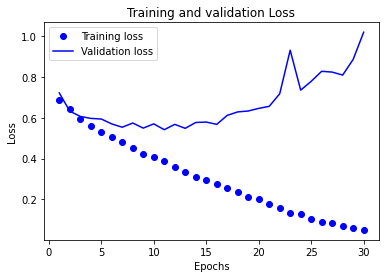

In [151]:
epoch = 30
epochs = range(1, epoch+1)
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation Loss")

Text(0.5, 1.0, 'Training and validation Accuracy')

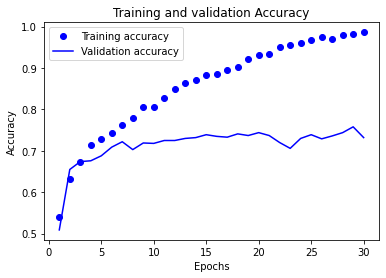

In [152]:
epoch = 30
epochs = range(1, epoch+1)
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label = "Training accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation Accuracy")

# By looking at the above graph we can say that this is the case of overfitting. 

In [153]:
model.save('cats_and_dogs_small_1.h5')

# Using Data Augmentation 

Data Augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformationsthat yield believable looking images.

In [31]:
datagen = ImageDataGenerator(
    rotation_range = 40, # value in degrees
    width_shift_range = 0.2, # range within which to randomly translate pictures vertically or horizontally.
    height_shift_range = 0.2, 
    shear_range=0.2, # randomly applying shear transformation
    zoom_range = 0.2, # randomly zooming inside pictures
    horizontal_flip = True, # randomly flipping half the images horizontally
    fill_mode = 'nearest' # used for filling in newly created pixels.
)

In [32]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
len(fnames)

1000

In [33]:
img_path = fnames[3]

In [34]:
#Loads an image into PIL format.
img = image.load_img(img_path, target_size = (150, 150))

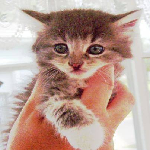

In [35]:
img

In [36]:
#Converts a PIL Image instance to a Numpy array.
x = image.img_to_array(img)

In [37]:
x.shape

(150, 150, 3)

In [38]:
#Returns an array containing the same data with a new shape.
x = x.reshape((1,) + x.shape)
x.shape

(1, 150, 150, 3)

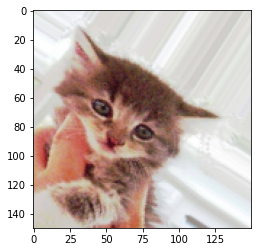

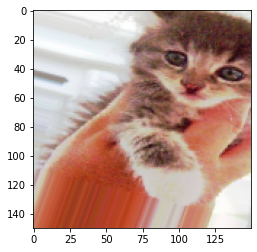

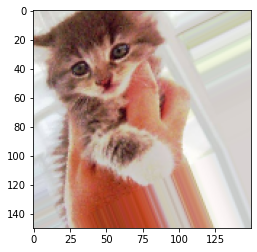

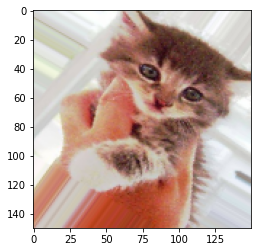

In [41]:
import matplotlib.pyplot as plt
i = 0
for batch in datagen.flow(x, batch_size = 1):
    #Takes data & label arrays, generates batches of augmented data.
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i+1
    if i%4==0:
        break
plt.show()
            

In [42]:
# New convnet that includes dropout
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [46]:
model1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), metrics = ['accuracy'])

# Training the new convnet using Data Augmentation

In [47]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [75]:
test_datagen = ImageDataGenerator(rescale = 1./ 255) #validation data should not be augmented.

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'    
)

Found 1000 images belonging to 2 classes.


In [51]:
history = model1.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/50
100/100 [==============================] - 457s 5s/step - loss: 0.6941 - accuracy: 0.5195 - val_loss: 0.6844 - val_accuracy: 0.5260
Epoch 2/50
100/100 [==============================] - 402s 4s/step - loss: 0.6853 - accuracy: 0.5420 - val_loss: 0.7260 - val_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 359s 4s/step - loss: 0.6716 - accuracy: 0.5805 - val_loss: 0.6512 - val_accuracy: 0.5940
Epoch 4/50
100/100 [==============================] - 374s 4s/step - loss: 0.6644 - accuracy: 0.5965 - val_loss: 0.6365 - val_accuracy: 0.6150
Epoch 5/50
100/100 [==============================] - 302s 3s/step - loss: 0.6474 - accuracy: 0.6145 - val_loss: 0.6255 - val_accuracy: 0.6350
Epoch 6/50
100/100 [==============================] - 339s 3s/step - loss: 0.6282 - accuracy: 0.6420 - val_loss: 0.6064 - val_accuracy: 0.6620
Epoch 7/50
100/100 [==============================] - 392s 4s/step - loss: 0.6197 - accuracy: 0.6560 - val_loss: 0.5905 - val_accuracy: 0.6870

In [53]:
history_dict = history.history

In [54]:
history_dict

{'loss': [0.6941112279891968,
  0.6853023767471313,
  0.6716400980949402,
  0.6644304394721985,
  0.647447407245636,
  0.6281712651252747,
  0.6196964383125305,
  0.6137333512306213,
  0.6111740469932556,
  0.597963273525238,
  0.5894604921340942,
  0.5802589058876038,
  0.5793702602386475,
  0.5765975117683411,
  0.5568432211875916,
  0.5585354566574097,
  0.5583176612854004,
  0.555506706237793,
  0.5592214465141296,
  0.5358913540840149,
  0.5428213477134705,
  0.5386301875114441,
  0.5460885167121887,
  0.5310301780700684,
  0.5197819471359253,
  0.525226891040802,
  0.5297590494155884,
  0.5163267254829407,
  0.5167398452758789,
  0.5093317627906799,
  0.5060453414916992,
  0.5080869793891907,
  0.48985764384269714,
  0.5038940906524658,
  0.5040201544761658,
  0.48442742228507996,
  0.49012336134910583,
  0.4865928888320923,
  0.5017704963684082,
  0.4958178997039795,
  0.48846468329429626,
  0.4764973819255829,
  0.4710531532764435,
  0.47847113013267517,
  0.4841345250606537,
 

In [55]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [59]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

Text(0.5, 1.0, 'Training and validation loss')

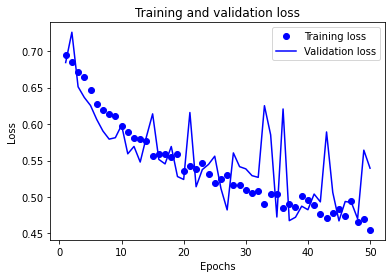

In [65]:
epoch = 50
epochs = range(1, epoch+1)
plt.plot(epochs, loss, 'bo', label = "Training loss" )
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation Accuracy')

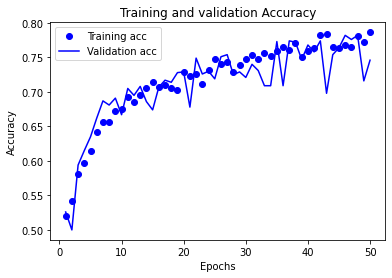

In [68]:
epoch = 50
epochs = range(1, epoch+1)
plt.plot(epochs, acc, 'bo', label = "Training acc" )
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation Accuracy")

# So by using Data augmentation and dropout and by tuning the networks parameter overfitting is removed. I am able to get an even better accuracy likely upto 74% on the validation set. We can get higher accuracy if we run it for 100 epochs.  

In [69]:
model1.save("cats_and_dog_small_2.h5")